<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('../data/states_edu.csv')
df.head(5)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [14]:
df.dropna(subset=['AVG_READING_4_SCORE'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 650 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   650 non-null    object 
 1   STATE                         650 non-null    object 
 2   YEAR                          650 non-null    int64  
 3   ENROLL                        481 non-null    float64
 4   TOTAL_REVENUE                 523 non-null    float64
 5   FEDERAL_REVENUE               523 non-null    float64
 6   STATE_REVENUE                 523 non-null    float64
 7   LOCAL_REVENUE                 523 non-null    float64
 8   TOTAL_EXPENDITURE             523 non-null    float64
 9   INSTRUCTION_EXPENDITURE       523 non-null    float64
 10  SUPPORT_SERVICES_EXPENDITURE  523 non-null    float64
 11  OTHER_EXPENDITURE             481 non-null    float64
 12  CAPITAL_OUTLAY_EXPENDITURE    523 non-null    float64
 13  GRAD

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Predictor for Test: Reading for 4th grade

How many different years of data are in our dataset? Use a pandas function.

In [15]:
df['YEAR'].unique().size

14

Let's compare Michigan to Ohio. Which state has the higher average predictor score across all years?

In [16]:
mich_pred_avg = df.loc[df['STATE'] == 'MICHIGAN', 'AVG_READING_4_SCORE'].sum()/len(df.loc[df['STATE']=='MICHIGAN'])
oh_pred_avg = df.loc[df['STATE'] == 'OHIO', 'AVG_READING_4_SCORE'].sum()/len(df.loc[df['STATE']=='OHIO'])
'Michigan Grade 4 Reading Average:', mich_pred_avg,'Ohio Grade 4 Reading Average:', oh_pred_avg


('Michigan Grade 4 Reading Average:',
 217.83333333333334,
 'Ohio Grade 4 Reading Average:',
 223.1818181818182)

Find the average for your predictor score across all states in 2019

In [6]:
nat_pred_avg = df.loc[df['YEAR'] == 2019, 'AVG_READING_4_SCORE'].sum()/len(df.loc[df['YEAR']==2019])
nat_pred_avg

219.79245283018867

Find the maximum predictor score for every state. Hint: there's a function that allows you to do this easily

In [17]:
state_max = df.loc[df.groupby('STATE')['AVG_READING_4_SCORE'].idxmax()]
state_max[['STATE','YEAR','AVG_READING_4_SCORE']]

,STATE,YEAR,AVG_READING_4_SCORE
969,ALABAMA,2011,220.0
766,ALASKA,2007,214.0
1664,ARIZONA,2019,216.0
1074,ARKANSAS,2013,219.0
1666,CALIFORNIA,2019,216.0
1076,COLORADO,2013,227.0
312,CONNECTICUT,1998,230.0
670,DELAWARE,2005,226.0
1670,DISTRICT_OF_COLUMBIA,2019,214.0
1671,DODEA,2019,235.0


<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (your chosen predictor). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [38]:
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL']
df['CAPITAL_PER_STUDENT'] = df['CAPITAL_OUTLAY_EXPENDITURE'] / df['ENROLL']
df['INSTRUCTION_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL']
df['LOCAL_WEALTH_PER_STUDENT'] = df['LOCAL_REVENUE'] / df['ENROLL']
df['STATE_WEALTH_PER_STUDENT'] = df['STATE_REVENUE'] / df['ENROLL']
df['FEDERAL_WEALTH_PER_STUDENT'] = df['FEDERAL_REVENUE'] / df['ENROLL']
df.corr()['AVG_READING_4_SCORE']

YEAR                                        0.321162
ENROLL                                     -0.072597
TOTAL_REVENUE                               0.065759
FEDERAL_REVENUE                            -0.033683
STATE_REVENUE                               0.009947
LOCAL_REVENUE                               0.138795
TOTAL_EXPENDITURE                           0.063397
INSTRUCTION_EXPENDITURE                     0.081636
SUPPORT_SERVICES_EXPENDITURE                0.065872
OTHER_EXPENDITURE                          -0.018447
CAPITAL_OUTLAY_EXPENDITURE                 -0.016318
GRADES_PK_G                                -0.001345
GRADES_KG_G                                -0.099669
GRADES_4_G                                 -0.093563
GRADES_8_G                                 -0.079223
GRADES_12_G                                -0.033048
GRADES_1_8_G                               -0.079353
GRADES_9_12_G                              -0.054618
GRADES_ALL_G                               -0.

The two highest correlation values are math 4 score and instruction spending per student, the 8th grade scores are thrown out because predicting a student's success on a 4th grade test using 8th grade data is pointless

Final feature list: Math 4 Score, Instructional Spending per Student

Feature selection justification: The correlation dataframe shows a correlation between the average math 4 score as well as instructional spending per student correlating to higher reading grade 4 scores.

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen predictor with any features you chose

**Visualization 1**

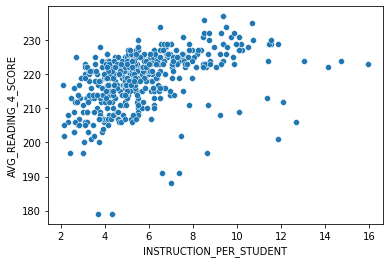

In [39]:
sns.scatterplot(x=df['INSTRUCTION_PER_STUDENT'], y=df['AVG_READING_4_SCORE'])

Instructional expenditure per student vs. Average reading 4 score

**Visualization 2**

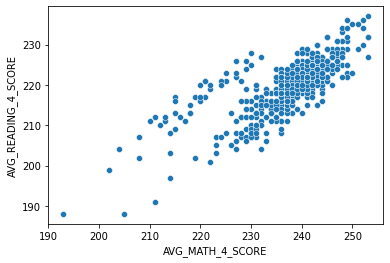

In [40]:
sns.scatterplot(x=df['AVG_MATH_4_SCORE'], y=df['AVG_READING_4_SCORE'])

Average math 4 score vs. Average reading 4 score

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [43]:
from sklearn.model_selection import train_test_split

In [41]:
X = df[['INSTRUCTION_PER_STUDENT','AVG_MATH_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_READING_4_SCORE']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.4, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

In [45]:
from sklearn.linear_model import LinearRegression


In [46]:
# create your model here
model = LinearRegression()

In [47]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
y_pred = model.predict(X_test)

Text(0, 0.5, 'AVG_READING_4_SCORE')

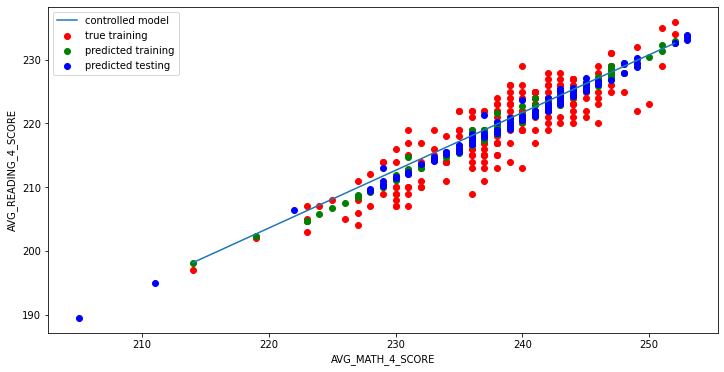

In [49]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'AVG_MATH_4_SCORE'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_READING_4_SCORE')

Text(0, 0.5, 'AVG_READING_4_SCORE')

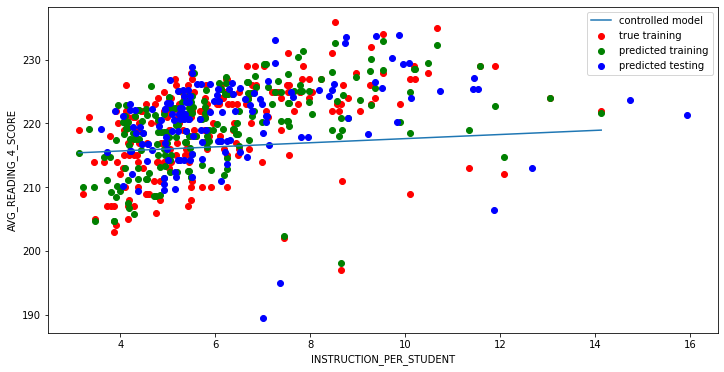

In [55]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'INSTRUCTION_PER_STUDENT'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_READING_4_SCORE')

<h2> Summary </h2>

Clearly the average math 4 score fits a linear regression model as an indicator much better

In [57]:
score = model.score(X_test,y_test)
mean = np.mean(model.predict(X_test)-y_test)
mean_abs_error = np.mean(np.abs(model.predict(X_test)-y_test))
r_mean_sq_error = np.mean((model.predict(X_test)-y_test)**2)**0.5
'Score: ', score, 'Mean: ', mean, 'Mean Absolute Error:', mean_abs_error, 'Root Mean Squared Error: ', r_mean_sq_error

('Score: ',
 0.7402225342804217,
 'Mean: ',
 0.08620431613909121,
 'Mean Absolute Error:',
 2.9539185237657213,
 'Root Mean Squared Error: ',
 3.6868457303230207)

I decided to try and predict the average score of a grade 4 standardized reading test off of average instructional spending per student and the performance on the grade 4 math test. Since the scatterplot showed a fairly linear correlation between the math 4 score and reading 4 score, I used a linear regression model to try and predict the reading 4 score. The model was only 74% accurate however which leads me to believe there must be better indicators of success on the reading test. Overall, scores on a math grade 4 test combined with the average instructional spending per student of the school system can be used to predict reading 4 test performance somewhat accurately.